In [1]:
# importing all the required modules
%matplotlib inline

import numpy as np
import pickle
import tensorflow as tf
import math
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
# loading the pickle file which is saved already
pickle_file = 'notMNIST.pickle'

with open(pickle_file, 'rb') as f:
    pickle_data = pickle.load(f)
    train_features = pickle_data['train_dataset']
    train_labels = pickle_data['train_labels']
    valid_features = pickle_data['valid_dataset']
    valid_labels = pickle_data['valid_labels']
    test_features = pickle_data['test_dataset']
    test_labels = pickle_data['test_labels']
    del pickle_data
    
print('Data and modules loaded.')

Data and modules loaded.


In [7]:
# 28x28 image  = 784 pixels
number_input_layers = 784

number_hidden_layers = 256

# 10 letters in the dataset
number_classes = 10



# creating the weights, these are the the system tries to find
weights = {
    'hidden_layer' : tf.Variable(tf.truncated_normal([number_input_layers, number_hidden_layers])),
    'output_layer' : tf.Variable(tf.truncated_normal([number_hidden_layers, number_classes]))
}
biases = {
    'hidden_layer' : tf.Variable(tf.zeros(number_hidden_layers)),
    'output_layer' : tf.Variable(tf.zeros(number_classes))
}


#creating the placeholders. Placeholder are the values we can supply on th runtime through feed dict
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, number_classes])

# x_flat = tf.reshape(x, [-1, number_input_layers])

# different feed dicts 
train_feed_dict = {x: train_features, y: train_labels}
valid_feed_dict = {x: valid_features, y: valid_labels}
test_feed_dict = {x: test_features, y: test_labels}

#hidden layer with RELU activation
layer_1 = tf.add(tf.matmul(x, weights['hidden_layer']), biases['hidden_layer'])
layer_1 = tf.nn.relu(layer_1)

# output layer with linear activation
logits = tf.matmul(layer_1, weights['output_layer']) + biases['output_layer']

# loss is average cross entropy
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))

# global varialble initializer
init = tf.global_variables_initializer()


In [8]:
# maps to get accuracy
is_correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))

Epoch  2/2: 100%|██████████| 1425/1425 [00:59<00:00, 23.80batches/s]


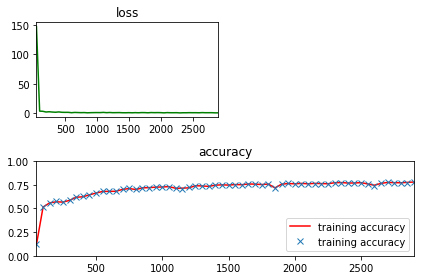

In [13]:
# real training

epochs = 2
batch_size = 100
learning_rate = 0.2

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

validation_accuracy = 0.0

# Measurements use for graphing loss and accuracy with map plot lib
log_batch_step = 50
batches = []
loss_batch = []
train_acc_batch = []
valid_acc_batch = []

# the actual session
with tf.Session() as session:
    session.run(init)
    # we are learning the data in batches of 50 items each. So number of batches will be no by batch size
    batch_count = int(math.ceil(len(train_features)/batch_size))
    
    # looping epoch number of times
    for epoch_i in range(epochs):
        # Progress bar
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
        
        # The training cycle
        for batch_i in batches_pbar:
            # Get a batch of training features and labels in groups of 50
            batch_start = batch_i*batch_size
            batch_features = train_features[batch_start:batch_start + batch_size]
            batch_labels = train_labels[batch_start:batch_start + batch_size]
            
            o,l = session.run([optimizer, loss], feed_dict={x:batch_features, y:batch_labels})
            
            if not batch_i % log_batch_step:
                # Calculate Training and Validation accuracy
                training_accuracy = session.run(accuracy, feed_dict=train_feed_dict)
                validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)

                # Log batches
                previous_batch = batches[-1] if batches else 0
                batches.append(log_batch_step + previous_batch)
                loss_batch.append(l)
                train_acc_batch.append(training_accuracy)
                valid_acc_batch.append(validation_accuracy)

        # Check accuracy against Validation data
        validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)
        
loss_plot = plt.subplot(221)
loss_plot.set_title("loss")
loss_plot.plot(batches, loss_batch, 'g')
loss_plot.set_xlim(batches[0], batches[-1])

acc_plot = plt.subplot(212)
acc_plot.set_title('accuracy')
acc_plot.plot(batches, train_acc_batch, 'r', label='training accuracy')
acc_plot.plot(batches, valid_acc_batch, 'x', label='training accuracy')
acc_plot.set_ylim([0, 1.0])
acc_plot.set_xlim([batches[0], batches[-1]])
acc_plot.legend(loc=4)
plt.tight_layout()
plt.show()

In [14]:
print(validation_accuracy)
print(loss_batch[-1])

0.772533
0.596026
